### Development of a score based on the gaussian heatmaps 
This can be used to generate the 'ground truth' score of the heatmaps produced from the Contextual layer , which will be compared with the score produced from the FCN heatmaps layer. 

- First we generate the heatmaps, and also visually cehck them. 
- the we pass the heatmaps to the routine that prodcues the scores 


## Build MRCNN model

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, math, io, time, gc, argparse, platform, pprint
import numpy as np
import tensorflow as tf
import keras
import keras.backend as KB
sys.path.append('../')
# import mrcnn.model_mrcnn  as mrcnn_modellib
# import mrcnn.model_fcn    as fcn_modellib
import mrcnn.visualize    as visualize
# import mrcnn.new_shapes   as shapes
import mrcnn.utils        as utils

from datetime           import datetime   
from mrcnn.utils        import command_line_parser, Paths
from mrcnn.coco         import prep_coco_dataset
from mrcnn.prep_notebook import build_fcn_train_pipeline,run_fcn_training_pipeline
from mrcnn.datagen  import data_gen_simulate

pp = pprint.PrettyPrinter(indent=2, width=100)
float_formatter = lambda x: "%10.4f" % x
np_format = {}
np_format['float']=float_formatter
# np.set_printoptions(linewidth=150, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)  
np.set_printoptions(linewidth=190, precision=4, threshold=10000, suppress = True)

##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = command_line_parser()
input_parms  =" --batch_size 1 "
input_parms +=" --epochs 2 --steps_in_epoch 32  --last_epoch 0 "
input_parms +=" --lr 0.00001 --val_steps 8 " 
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco "
input_parms +=" --fcn_logs_dir   train_fcn8_coco_adam "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_1569.h5"
input_parms +=" --opt            adagrad "
input_parms +=" --fcn_arch       fcn8 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout        screen "
input_parms +=" --coco_classes   62 63 67 78 79 80 81 82 72 73 74 75 76 77 "
input_parms +=" --new_log_folder    "
print(input_parms)

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)

mrcnn_model, fcn_model = build_fcn_train_pipeline(args = args)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 --batch_size 1  --epochs 2 --steps_in_epoch 32  --last_epoch 0  --lr 0.00001 --val_steps 8  --mrcnn_logs_dir train_mrcnn_coco  --fcn_logs_dir   train_fcn8_coco_adam  --mrcnn_model    last  --fcn_model      F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_1569.h5 --opt            adagrad  --fcn_arch       fcn8  --fcn_layers     all  --sysout        screen  --coco_classes   62 63 67 78 79 80 81 82 72 73 74 75 76 77  --new_log_folder    

Arguments passed :
--------------------
batch_size                     1
coco_classes                   [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
epochs                         2
fcn_arch                       FCN8
fcn_layers                     ['all']
fcn_logs_dir                   train_fcn8_coco_adam
fcn_model                      F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_1569.h5
last_epoch                     0
lr                     

    sort_inds              :  <class 'tensorflow.python.framework.ops.Tensor'>  shape  (1, 81, 200)
    class_grid             :  <class 'tensorflow.python.framework.ops.Tensor'>  shape  (1, 81, 200)
    batch_grid             :  <class 'tensorflow.python.framework.ops.Tensor'>  shape  (1, 81, 200)
    roi_grid shape         :  <class 'tensorflow.python.framework.ops.Tensor'>  shape  (1, 81, 200)
    roi_grid_exp           :  <class 'tensorflow.python.framework.ops.Tensor'>  shape  (1, 81, 200, 1)
    gather_inds            :  <class 'tensorflow.python.framework.ops.Tensor'>  shape  (1, 81, 200, 3)
    pred_tensor            :  (1, 81, 200, 8)

 
  > build_pr_heatmap() for  ['pred_heatmap']
    in_tensor shape        :  (1, 81, 200, 8)
    num bboxes per class   :  200
    heatmap scale        :  4 Dimensions:  w: 256  h: 256
    pt2_sum shape  :  (1, 81, 200)
    pt2_ind shape  :  (?, 3)
    pt2_dense shape:  (?, 8)
    X/Y shapes : (256, 256) (256, 256)
    Ones:     (?, 1, 1)
    on

   FCN Block 31 shape is               :  (None, 64, 64, 256)
   FCN Block 32 shape is               :  (None, 64, 64, 256)
   FCN Block 33 shape is               :  (None, 64, 64, 256)
   FCN Block 34 (Max pooling) shape is :  (?, 32, 32, 256)
   FCN Block 41 shape is               :  (None, 32, 32, 512)
   FCN Block 42 shape is               :  (None, 32, 32, 512)
   FCN Block 43 shape is               :  (None, 32, 32, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 16, 16, 512)
   FCN Block 51 shape is               :  (None, 16, 16, 512)
   FCN Block 52 shape is               :  (None, 16, 16, 512)
   FCN Block 53 shape is               :  (None, 16, 16, 512)
   FCN Block 54 (Max pooling) shape is :  (None, 8, 8, 512)

   --- FCN32 ----------------------------
   FCN fully connected 1 (fc1) shape   :  (None, 8, 8, 4096)
   FCN fully connected 2 (fc2) shape   :  (None, 8, 8, 4096)
   FCN conv2d (fcn32_deconv2D) shape   :  (?, 8, 8, 81)  keras_tensor  True

   --- FCN16 ---------

-----------------------------------------------
 Load Model with init parm: [ F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_1569.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_1569.h5
layers type:  <class 'list'> length:  41
    Weights file loaded: F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_1569.h5 
FCN  MODEL Load weight file COMPLETE 


## Build Training & Validation Datasets

In [7]:
load_class_ids = [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]

print('load coco classes: ', load_class_ids)

dataset_train, train_generator= prep_coco_dataset(['train', 'val35k'], fcn_model.config, generator = True,shuffle = False, active_class_ids=load_class_ids)
 
# dataset_val, val_generator    = prep_coco_dataset(['minival'], fcn_config, generator = True, shuffle = False)

dataset_train.image_ids[:20]
print(dataset_train, train_generator)
# for i in dataset_train.image_ids[:100]:
#     print(i, ' coco id ', dataset_train.image_info[i]['id'])

load coco classes:  [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_train2014.json  into memory...
Done (t=27.53s)
creating index...
index created!
 load subset of classes:  [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
 image dir            :  F:\MLDatasets\coco2014\train2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_train2014.json
 number of images     :  24242
 image_ids[:10]       :  [131074, 131075, 524311, 524314, 262172, 393251, 131113, 524340, 393268, 262207]
 image_ids[1000:1010] :  [5113, 5115, 267266, 136200, 398349, 529427, 5140, 5142, 136230, 136232]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_valminusminival2014.json  into memory...
Done (t=10.24s)
creating index...
index created!
 load subset of classes:  [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
 image dir            :  F:\MLDatasets\coco2014\val2014
 js

## Display Images

###  Display image with Ground Truth bounding boxes and masks

D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


 Image_id    :  0  Reference:  http://cocodataset.org/#explore?id=131074 Coco Id: 131074
 Image meta [   0  428  640    3  169    0  854 1024    1    1]
 Class ids   :  (5,)    [60 60 27 66 60]
 Class Names :  ['bed', 'bed', 'handbag', 'remote', 'bed']


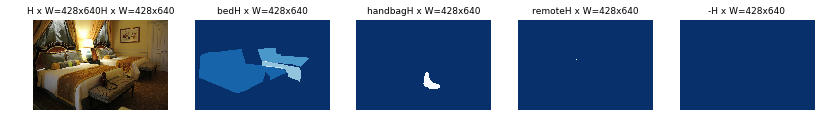

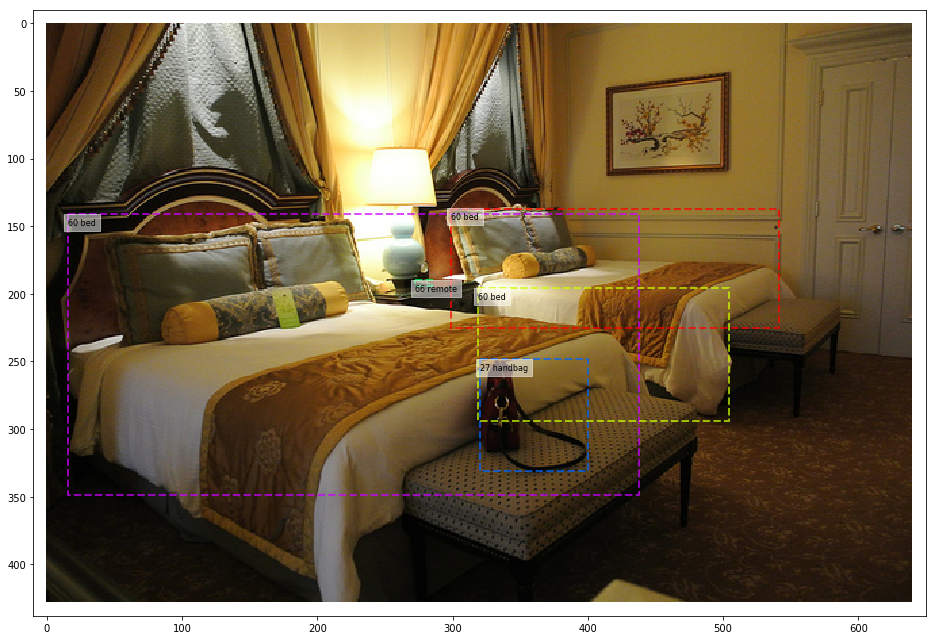

In [8]:
train_batch_x, train_batch_y = next(train_generator)
visualize.display_training_batch(dataset_train, train_batch_x)

In [10]:
IMAGE_LIST = train_batch_x[1][:,0]
print('IMAGE_LIST : ', IMAGE_LIST)
for image_id in IMAGE_LIST:
    print()
    print('IMAGE_ID : ', image_id)#### Load a specific image using image_id
    annotations = dataset_train.image_info[image_id]["annotations"]
#     print(annotations)
    for annotation in annotations:
        class_id = dataset_train.map_source_class_id( "coco.{}".format(annotation['category_id']))
        print("coco.id: {} --> class_id : {}  - {} ".format(annotation['category_id'],class_id, dataset_train.class_names[class_id]))

IMAGE_LIST :  [0]

IMAGE_ID :  0
coco.id: 65 --> class_id : 60  - bed 
coco.id: 65 --> class_id : 60  - bed 
coco.id: 31 --> class_id : 27  - handbag 
coco.id: 75 --> class_id : 66  - remote 
coco.id: 65 --> class_id : 60  - bed 


### Load a specific image using image_id

 batch size is : 1
 load image ud:  3


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


 Image_id    :  3  Reference:  http://cocodataset.org/#explore?id=524314 Coco Id: 524314
 Image meta [   3  428  640    3  169    0  854 1024    1    1]
 Class ids   :  (10,)    [ 3  1  1 78  3 27 68  3 27 78]
 Class Names :  ['car', 'person', 'person', 'teddy bear', 'car', 'handbag', 'cell phone', 'car', 'handbag', 'teddy bear']


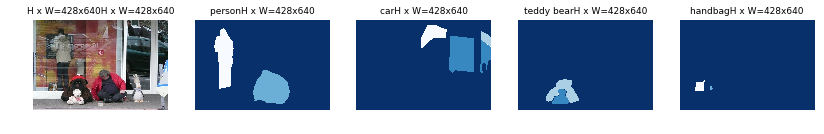

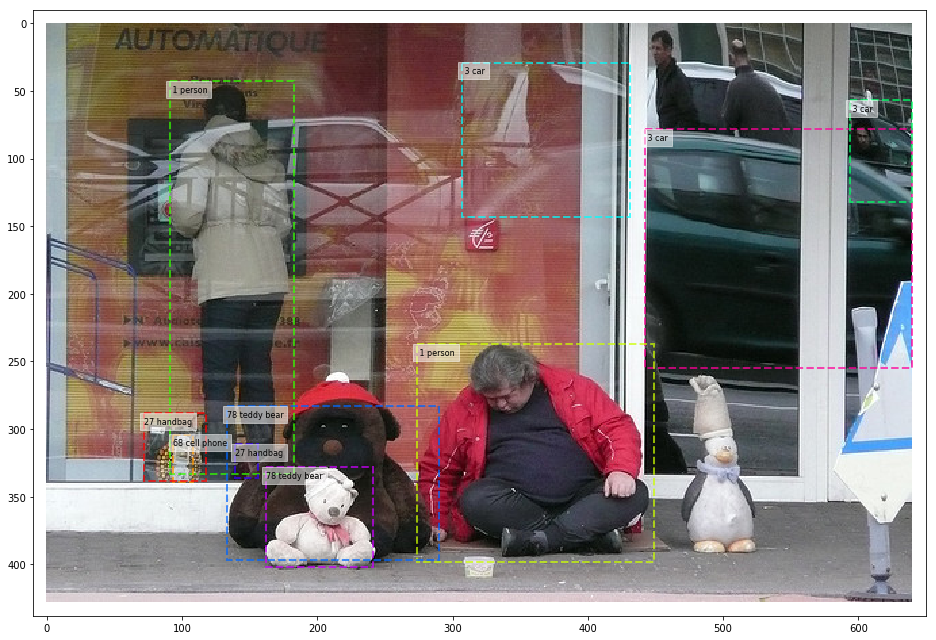

In [11]:
train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [3])
visualize.display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x_1:
#     print(i.shape)
# print(mrcnn_model.keras_model.input_names)
# imgmeta_idx = mrcnn_model.keras_model.input_names.index('input_image_meta')
# print(imgmeta_idx)
# img_meta    = train_batch_x_1[imgmeta_idx]
# print(img_meta)
# del train_batch_x_1    

## Pass data through MRCNN-FCN model

####  `run_mrcnn_training_pipeline()`

In [12]:
from mrcnn.prep_notebook import run_fcn_training_pipeline   ###run_pipeline_on_input
outputs = run_fcn_training_pipeline(mrcnn_model, fcn_model, dataset_train, train_batch_x, verbose= 1)

** Pass through MRCNN model:
/* Inputs */
Input  0:  (input_image:0                           ) 	  Input shape: (1, 1024, 1024, 3)
Input  1:  (input_image_meta:0                      ) 	  Input shape: (1, 89)
Input  2:  (input_rpn_match:0                       ) 	  Input shape: (1, 261888, 1)
Input  3:  (input_rpn_bbox:0                        ) 	  Input shape: (1, 256, 4)
Input  4:  (input_gt_class_ids:0                    ) 	  Input shape: (1, 100)
Input  5:  (input_gt_boxes:0                        ) 	  Input shape: (1, 100, 4)
Requested layers:
-----------------
Layer:   0     cntxt_layer/pred_heatmap:0     (1, 256, 256, 81)
Layer:   1     cntxt_layer/pred_heatmap_scores:0     (1, 81, 200, 16)
Layer:   2     cntxt_layer_gt/gt_heatmap:0     (1, 256, 256, 81)
Layer:   3     cntxt_layer_gt/gt_heatmap_scores:0     (1, 81, 200, 16)
Layer:   4     mrcnn_class/Reshape_1:0     (?, 200, 81)
Layer:   5     mrcnn_bbox/Reshape:0     (?, 200, 81, 4)
Layer:   6     proposal_targets/output_rois:0

#### Load output data

In [15]:
print(len(outputs), outputs.keys())
model_pr_heatmap                = outputs['mrcnn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_pr_heatmap_scores         = outputs['mrcnn_output'][1]          # layer:  1   shape: (1, 81, 200, 11)
model_gt_heatmap                = outputs['mrcnn_output'][2]          # layer:  2   shape: (1, 256, 256, 81)
model_gt_heatmap_scores         = outputs['mrcnn_output'][3]          # layer:  3   shape: (1, 81, 200, 11)
model_mrcnn_class               = outputs['mrcnn_output'][4]
model_mrcnn_bbox                = outputs['mrcnn_output'][5]
model_output_rois               = outputs['mrcnn_output'][6]
model_target_class_ids          = outputs['mrcnn_output'][7]
model_roi_gt_boxes              = outputs['mrcnn_output'][8]

model_fcn_heatmap               = outputs['fcn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_fcn_softmax               = outputs['fcn_output'][1]          # layer:  1   shape: ()
model_MSE_loss                  = outputs['fcn_output'][2]          # layer:  1   shape: ()
model_CE_loss                   = outputs['fcn_output'][3]          # layer:  1   shape: ()
model_fcn_scores                 = outputs['fcn_output'][4]

print('model_pr_heatmap       : ', model_gt_heatmap.shape)
print('model_pr_heatmap_scores: ', model_gt_heatmap_scores.shape)
print('model_gt_heatmap       : ', model_gt_heatmap.shape)
print('model_gt_heatmap_scores: ', model_gt_heatmap_scores.shape)
print('model_fcn_heatmap      : ', model_fcn_heatmap.shape)
print('model_fcn_softmax      : ', model_fcn_softmax.shape)
print('model_fcn_scores       : ', model_fcn_scores.shape)
print('model_CE_loss          : ', model_CE_loss)
print('model_MSE_loss         : ', model_MSE_loss)

img_id = 0

5 dict_keys(['image_batch', 'fcn_input', 'mrcnn_input', 'mrcnn_output', 'fcn_output'])
model_pr_heatmap       :  (1, 256, 256, 81)
model_pr_heatmap_scores:  (1, 81, 200, 16)
model_gt_heatmap       :  (1, 256, 256, 81)
model_gt_heatmap_scores:  (1, 81, 200, 16)
model_fcn_heatmap      :  (1, 256, 256, 81)
model_fcn_softmax      :  (1, 256, 256, 81)
model_fcn_scores       :  (1, 81, 200, 26)
model_CE_loss          :  [[3662.0674]]
model_MSE_loss         :  [[0.0001]]


#### Display output shapes

In [14]:
print(outputs['image_batch'].shape)
for i in outputs:
    print('Group:', i)
    for item in outputs[i]:
        print(' Type ', type(item), item.shape)

(1, 1024, 1024, 3)
Group: image_batch
 Type  <class 'numpy.ndarray'> (1024, 1024, 3)
Group: fcn_input
 Type  <class 'numpy.ndarray'> (1, 89)
 Type  <class 'numpy.ndarray'> (1, 256, 256, 81)
 Type  <class 'numpy.ndarray'> (1, 81, 200, 16)
 Type  <class 'numpy.ndarray'> (1, 256, 256, 81)
 Type  <class 'numpy.ndarray'> (1, 81, 200, 16)
Group: mrcnn_input
 Type  <class 'numpy.ndarray'> (1, 1024, 1024, 3)
 Type  <class 'numpy.ndarray'> (1, 89)
 Type  <class 'numpy.ndarray'> (1, 261888, 1)
 Type  <class 'numpy.ndarray'> (1, 256, 4)
 Type  <class 'numpy.ndarray'> (1, 100)
 Type  <class 'numpy.ndarray'> (1, 100, 4)
Group: mrcnn_output
 Type  <class 'numpy.ndarray'> (1, 256, 256, 81)
 Type  <class 'numpy.ndarray'> (1, 81, 200, 16)
 Type  <class 'numpy.ndarray'> (1, 256, 256, 81)
 Type  <class 'numpy.ndarray'> (1, 81, 200, 16)
 Type  <class 'numpy.ndarray'> (1, 200, 81)
 Type  <class 'numpy.ndarray'> (1, 200, 81, 4)
 Type  <class 'numpy.ndarray'> (1, 200, 4)
 Type  <class 'numpy.ndarray'> (1, 20

#### Load input data

In [ ]:
# input_image      =  train_batch_x[0]
# input_image_meta =  train_batch_x[1]
# # input_rpn_match  =  train_batch_x[2]
# # input_rpn_bbox   =  train_batch_x[3]
input_gt_class_ids = outputs['mrcnn_input'][4]
# # input_gt_bboxes    = train_batch_x[5]
# # input_gt_masks     = train_batch_x[6]
# print(' Input image shape is :', input_image.shape)
# h, w = input_image.shape[1], input_image.shape[2]      #  tf.shape(input_image)[1], tf.shape(input_image)[2]
# input_normlzd_gt_bboxes = tf.identity(input_gt_bboxes / [h,w,h,w])

# # gt_masks   =  train_batch_x[6]
# print(' input_rpn_match    ', input_rpn_match.shape)
# print(' input_rpn_bbox     ', input_rpn_bbox.shape)
print(' input_gt_class_ids ', input_gt_class_ids.shape)
print(input_gt_class_ids)
# print(' input_gt_bboxes    ', input_gt_bboxes.shape)
# print(' input_normlzd_gt_bboxes    ', input_normlzd_gt_bboxes.shape)
# print(input_image_meta)

## Display values from FCN Output

In [ ]:
print(np.bincount(model_gt_heatmap_scores[img_id,:,:,4])) 

In [ ]:
img_id = 1
gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
pr_class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
fcn_class_ids = np.unique(model_fcn_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  GT ClassIds: {}'.format(img_id, gt_class_ids))
print('Image : {}  PR ClassIds: {}'.format(img_id, pr_class_ids))
print('Image : {}  FCN ClassIds: {}'.format(img_id, fcn_class_ids))
# for i in range(pr_class_ids[-1]+1):
for i in range(81):
    print('class:', i, '-', dataset_train.class_names[i],'predicted in MRCNN' if i in pr_class_ids else ' ' , ' (Ground Truth) ' if  i in gt_class_ids else ' ')
    print('FCN class: {:3d}   min: {:12.8f}    max: {:12.8f}    avg: {:12.8f}    sum: {:12.8f} '.format(i, np.min(model_fcn_heatmap[img_id,:,:,i]), 
                                                                    np.max(model_fcn_heatmap[img_id,:,:,i]), np.mean(model_fcn_heatmap[img_id,:,:,i]), 
                                                                    np.sum(model_fcn_heatmap[img_id,:,:,i])))
    print('PR  class: {:3d}   min: {:12.8f}    max: {:12.8f}    avg: {:12.8f}    sum: {:12.8f} '.format(i, np.min(model_pr_heatmap[img_id,:,:,i]), 
                                                                    np.max(model_pr_heatmap[img_id,:,:,i]),  np.mean(model_pr_heatmap[img_id,:,:,i]),
                                                                    np.sum(model_pr_heatmap[img_id,:,:,i])))
    print('GT  class: {:3d}   min: {:12.8f}    max: {:12.8f}    avg: {:12.8f}    sum: {:12.8f} '.format(i, np.min(model_gt_heatmap[img_id,:,:,i]), 
                                                                    np.max(model_gt_heatmap[img_id,:,:,i]),  np.mean(model_gt_heatmap[img_id,:,:,i]),
                                                                    np.sum(model_gt_heatmap[img_id,:,:,i])))
    print()

In [ ]:
np.set_printoptions(linewidth=190, precision=4, threshold=10000, suppress = True)
print('Image : {}  PR ClassIds: {}'.format(img_id, pr_class_ids))
print('Image : {}  fcn ClassIds: {}'.format(img_id, fcn_class_ids))
print(model_fcn_scores.shape)
for i in  fcn_class_ids:
    print('\nclass:', i, '-', dataset_train.class_names[i],' - predicted in MRCNN' if i in pr_class_ids else ' ' , ' - (Ground Truth) ' if  i in gt_class_ids else ' ')
    print(model_fcn_scores[img_id,i, :25])

In [ ]:
print(model_pr_heatmap_scores.shape)
print(model_fcn_scores[0,0:70])

In [ ]:
# for i in range(10):
#     print(model_fcn_heatmap[0,i,:,4])
#     print(np.min(model_fcn_heatmap[0,i,:,1]), np.max(model_fcn_heatmap[0,i,:,1]))

## Display Output from MRCNN

In [ ]:
float_formatter = lambda x: "%10.3f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=150, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)

gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))


####  `Pred_Tensor`, `Pred_heatmap`, `mrcnn_class`

In [ ]:
np.set_printoptions(precision=4, threshold=None, linewidth=210, suppress=True)
img = 0

# print(KB.int_shape(output_rois))
# print(output_rois[img,:15]*[128, 128,128,128])
# print(input_gt_class_ids[0])

# print(' Pred_tensor')
# print(pred_tensor.shape)
# print(pred_tensor[img,:,:10])

# print(' gt_tensor')
# print(gt_tensor.shape)
# print(gt_tensor[img,:,:10])

# print(' output_rois')
# print(output_rois.shape)
# print(output_rois[img,:15] * [128, 128,128,128])


# print(' roi_gt_boxes')
# print(roi_gt_boxes.shape)
# print(roi_gt_boxes[img,:15] * [128, 128,128,128])

print(' Pred Heatmap Scores')
print(pred_heatmap_scores.dtype)


print(' FCN Scores')
print(fcn_scores.dtype)
for cls in range(4):
    print(pred_heatmap_scores[img,cls,:10])
    print(fcn_scores[img,cls,:10,2:])

# img = 2
# max_score = np.max(mrcnn_class, axis = -1)
# max_class = np.argmax(mrcnn_class, axis = -1)
# # print(' output_rois[',img,'] \n', output_rois[1]*[128,128,128,128])
# print('max class shape:',max_class.shape, 'max score shape: ',max_score.shape)
# print('max class[',img,']\n',max_class[img])
# print('max score[',img,']\n',max_score[img])
# print('mrcnn class.shape ',mrcnn_class.shape)
# print('mrcnn_class[',img,',:]\n',mrcnn_class[img,:])
# print(output_rois[1])
 


####  Display `output_rois` for visual check - passed on to  `build_pred_tensor()`

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())
print('output_rois shape is ', output_rois.shape)
img = 0
for img in range(5):
    print('Image ', img , ' ------------')
    print(output_rois[img]*[128,128,128,128])


####  Display for visual check - `pred_tensor` is the final result which is passed on to  `build_gaussian_tf()`

In [ ]:
# with sess.as_default():
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())
print('pred_tensor shape is ', pred_tensor.shape)
img = 0
for k in range(4):
    print('Image ', img , '/ Class ',k,' ------------')
    print(pred_tensor[img,k])


####  Display for visual check - `gt_tensor` is the final result which is passed on to  `build_gaussian_tf()`

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
print('gt_tensor shape is ', gt_tensor.shape)
img = 1
for k in range(4):
    print('Image ', img , '/ Class ',k,' ------------')
    print(gt_tensor[img,k])


####  Display for visual check - `pred_heatmap_scores` is the final result which is passed from  `build_gaussian_tf()`

In [ ]:
# with sess.as_default():
np.set_printoptions(linewidth=150, precision=6, suppress=True)
# print('scatter shape is ', pred_scatt.get_shape())
print('pred_heatmap_scores shape is ', pred_heatmap_scores.shape)
for img in [0,1,2]:
    for k in range(4):
        print('Image ', img , '/ Class ',k,' ------------')
        print(np.min(pred_heatmap_scores[img,k,:,8]))
        print(pred_heatmap_scores[img,k])

####  `GT_HEATMAP_SCORES` 

In [ ]:

print('gt_heatmap_scores shape is ', model_gt_heatmap_scores.shape)
img_id = 0
gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  GT ClassIds: {}'.format(img_id, gt_class_ids))

for cls in gt_class_ids:
    print('\nImage ', img_id , '/ Class ',cls,' ------------')
    for box in range(model_gt_heatmap_scores.shape[2]):
        print(model_gt_heatmap_scores[img_id,cls, box])
        if (np.all(model_gt_heatmap_scores[img_id,cls, box, :4] == 0)):
            break

#### `PRED_HEATMAP_SCORES` 

In [ ]:
print('pred_heatmap_scores shape is ', model_pred_heatmap_scores.shape)
img_id = 0
pr_class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  GT ClassIds: {}'.format(img_id, pr_class_ids))

for cls in pr_class_ids:
    print('\nImage ', img_id , '/ Class ',cls,' ------------')
    for box in range(model_pred_heatmap_scores.shape[2]):
        print(model_pred_heatmap_scores[img_id,cls, box])
        if (np.all(model_pred_heatmap_scores[img_id,cls, box, :4] == 0)):
            break

####  `gt_heatmap_scores`  and `fcn_heatmap_scores` 

In [ ]:
# with sess.as_default():
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())

img = 0
for i in [1,2,3]:
    for j in range(32):
        print('Image ', img , '/ Class ',i,' ------------')

        print(gt_heatmap_scores[img,i,j])
        print(pred_heatmap_scores[img,i,j])
        print(fcn_heatmap_scores[img,i,j,[0,1,2,3,4,5,11,12,13,14,15]])

#### `pred_heatmap_norm` 

In [ ]:
print(pred_heatmap_norm.shape)
temp = pred_heatmap_norm
np.set_printoptions(linewidth=150, threshold=10000, suppress=False)
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img ',i,' class ', j, ' sum:',temp_sum[i,j],  ' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    

####  `fcn_heatmap`

In [ ]:
np.set_printoptions(linewidth=150, threshold=10000, suppress=False)
temp = fcn_heatmap_norm
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img ',i,' class ', j, ' sum:',temp_sum[i,j],  ' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    

In [ ]:
np.set_printoptions(linewidth=150, threshold=10000, suppress=False)
temp = fcn_heatmap
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img ',i,' class ', j, ' sum:',temp_sum[i,j],  ' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    


# sess = KB.get_session()
# with sess.as_default():
#     temp = tf.identity(fcn_heatmap
#     np.set_printoptions(linewidth=150, threshold=10000)
#     print('  output shapes :',  temp.get_shape())
#     temp_sum = tf.reduce_sum(temp, [2,3])
#     temp_min = tf.reduce_min(temp, [2,3])
#     temp_max = tf.reduce_max(temp, [2,3])
#     temp_avg = tf.reduce_mean(temp, [2,3])
#     print('temp_sum is ', temp_sum.shape)
#     for i in range(5):
#         for j in range(4):
#                 print('img/cls ',i,'/', j,'  sum:',temp_sum[i,j], 'min',temp_min[i,j] ,'max',temp_max[i,j] ,'avg',temp_avg[i,j])

In [ ]:
np.set_printoptions(linewidth=150, threshold=10000, precision = 6,suppress=False)
sess = KB.get_session()
with sess.as_default():
    tmp = tf.identity(fcn_heatmap)
    print(tf.shape(tmp).eval())
    reduce_max = tf.reduce_max(tmp,axis = [1,2], keepdims=True)
    print(tf.shape(reduce_max).eval())
    reduce_min = tf.reduce_min(tmp, axis = [1,2], keepdims=True)
    print(tf.shape(reduce_min).eval())
    print(reduce_min.eval())
    print(reduce_max.eval())
    y  =  (tmp - reduce_min) / (reduce_max - reduce_min)        
    print(tf.shape(y).eval())

## Display Heatmaps

In [ ]:
from mrcnn.visualize import (plot_one_bbox_heatmap, 
                             plot_3d_heatmap, plot_2d_heatmap, 
                              plot_2d_heatmap_compare, plot_3d_heatmap_compare)
# import matplotlib as plt
# %matplotlib inline
img_id = 0
image_id=outputs['mrcnn_input'][1][img_id,0]
print('Image id: ',image_id, ' Coco ID: ', dataset_train.image_info[image_id]['id'])

coco_class_names = dataset_train.class_names
gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
pr_class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
fcn_class_ids = np.unique(model_fcn_scores[img_id,:,:,4]).astype(int).tolist()
print('GT   class ids: ', gt_class_ids)
print('Pred class ids: ', pr_class_ids)
print('FCN  class ids: ', fcn_class_ids)

### 2D Plots

####  2D plot of `model_gt_heatmap` returned from model

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                 class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model (with Ground Truth Bounding Boxes)

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_2d_heatmap(model_fcn_heatmap, model_gt_heatmap_scores,img_id, gt_class_ids, columns = 3,
                             class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model (with MRCNN PREDICTED Bounding Boxes)

In [ ]:
print(model_fcn_heatmap.shape)
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
fig  = visualize.plot_2d_heatmap(model_fcn_heatmap, model_pr_heatmap_scores,img_id, pr_class_ids, columns = 3,
                             class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  Pred ClassIds: {}'.format(img_id, class_ids))
    print('            Gt   ClassIds: {}'.format(np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()))
#     plot_2d_heatmap_with_bboxes(model_fcn_heatmap[...,:class_ids[-1]+1], model_gt_heatmap_scores, img_id, 
#                                 class_ids, class_names = class_names, columns = 2, scale = 4)
    fig = plot_2d_heatmap(model_fcn_heatmap, model_pr_heatmap_scores, img_id,
                                class_names = coco_class_names, columns = 4, scale = 4, scaling = 'all')
#     fig.savefig('fcn_heatmaps_2d.png')

####  2D plot of `pred_heatmap_norm` returned from MRCNN 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
plot_2d_heatmap(model_pr_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, 
                            class_names = coco_class_names, size = (7,7), scale = 4)

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
#     class_ids = list(range(30))
    plot_2d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, model_pr_heatmap_scores, 
                            img_id, class_ids = class_ids, class_names = coco_class_names, scale = 4, scaling = 'class' )    

### Overlay predictions on image

#### Overlay image with gt_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn
# visualize.display_image_bw(image)
print(model_gt_heatmap_scores.shape)
class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('class ids: ', class_ids)
display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'gt',
                     config = mrcnn_config, class_ids = class_ids, class_names = coco_class_names)

#### Overlay image with pred_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn
# visualize.display_image_bw(image)
print(model_gt_heatmap_scores.shape)
class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('class ids: ', class_ids)
display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
                     config = mrcnn_config, class_ids = class_ids, class_names = coco_class_names)

#### Overlay image with fcn_heatmaps

In [ ]:
# visualize.display_heatmaps_mrcnn_fcn(outputs['mrcnn_input'], outputs['mrcnn_output'], 0, heatmap = model_fcn_heatmap, hm = 'pr', columns = 3,
#                      class_ids = gt_class_ids, 
#                                      config = mrcnn_model.config, class_names = coco_class_names, scaling = 'clip')

#### Overlay image with gt_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(outputs['mrcnn_input'], outputs['mrcnn_output'], heatmap = model_fcn_heatmap, image_id = 0, 
                                   hm = 'pr', config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')

#### Overlay image with pr_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(outputs['mrcnn_input'], outputs['mrcnn_output'], heatmap = model_fcn_heatmap, image_id = 0, hm = 'pr', 
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names, scaling = 'each')

###  3D Plots

####  3D plot of  `gt_heatmap_norm` returned form code above

In [ ]:
for img_id in [0]: ## range(mrcnn_config.BATCH_SIZE):
    print(model_gt_heatmap.shape)
    class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(model_gt_heatmap, img_id, class_ids, class_names = coco_class_names)


####  3D plot of `pred_heatmap_norm` returned form model

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(model_pred_heatmap_norm.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(model_pred_heatmap_norm, img_id, class_ids, class_names = coco_class_names, zlim = 'all' )


####  3D plot of `fcn_heatmap` returned form model - classes predicted by MRCNN only 

In [ ]:
print(np.max(model_fcn_heatmap), np.min(model_fcn_heatmap))

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(model_fcn_heatmap.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = coco_class_names, zlim = 'one',scaling = True)


####  3D plot of `fcn_softmax` returned form model - only classes in pred_scores

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(model_fcn_heatmap.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(model_fcn_softmax, img_id, class_ids,class_names = coco_class_names, scaling = False)

####  3D plot of `fcn_heatmap` returned form model - all classes

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
#     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
#     plot_3d_heatmap_all_classes(model_fcn_heatmap[...,:class_ids[-1]+1], img_id, class_names = class_names, size = (8,8), zlim=0.0)
    plot_3d_heatmap(model_fcn_heatmap, img_id, class_names = class_names, columns = 2,scaling = True)

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(model_pred_heatmap_norm.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    class_ids.append(1)
    class_ids = list(range(30))
#     print(class_ids)
    plot_3d_heatmap_compare(model_pred_heatmap_norm,model_fcn_heatmap, img_id, class_ids = class_ids, 
                            class_names = class_names, size=(8,8), zlim = 'all' , scaling = True)

####  3D comparative display `gt_heatmap` / `fcn_heatmap` 

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    class_ids.extend([1,2])
    print(class_ids)
    print(type(class_ids))
    class_ids.sort()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap_compare(model_gt_heatmap,model_fcn_heatmap, img_id, class_ids, class_names = class_names, size=(8,8), zlim = 0 )

##  FCN Scoring - `FCNScoringLayer`

### Display shapes

In [10]:
print(model_gt_heatmap.shape)
print(model_gt_heatmap_scores.shape)
print(model_pr_heatmap.shape)
print(model_pr_heatmap_scores.shape)
print(model_fcn_heatmap.shape)
print(model_fcn_softmax.shape)

(2, 256, 256, 81)
(2, 81, 200, 11)
(2, 256, 256, 81)
(2, 81, 200, 11)
(2, 256, 256, 81)
(2, 256, 256, 81)


###  define batch_slice (obsolete)

In [ ]:
##-----------------------------------------------------------------------------------
##
##-----------------------------------------------------------------------------------

def batch_slice_fcn(inputs, graph_fn, batch_size, config = None, names=None):
    '''
    Splits inputs into slices and feeds each slice to a copy of the given
    computation graph and then combines the results. It allows you to run a
    graph on a batch of inputs even if the graph is written to support one
    instance only.

    inputs:     list of tensors. All must have the same first dimension length
    graph_fn:   A function that returns a TF tensor that's part of a graph.
    batch_size: number of slices to divide the data into.
    names:      If provided, assigns names to the resulting tensors.
    '''
    print(' batch slice fcn')
    if not isinstance(inputs, list):
        inputs = [inputs]
    fcn_hm = inputs[0]        
    pr_hm_scores = inputs[1]
    gt_hm_scores = inputs[2]
    for i,x in enumerate(inputs):
        print('input ', i ,' ----' , KB.int_shape(x), 'Keras tensor ', KB.is_keras_tensor(x))
    outputs = []
    
    for i in range(batch_size):
        inputs_slice = [x[i] for x in inputs]    # inputs is a list eg. [sc, ix] => input_slice = [sc[0], ix[0],...]
        # for i in inputs_slice:
        print(' ----' , KB.int_shape(fcn_hm[i]))
        print(' ----' , KB.int_shape(pr_hm_scores[i]))
        print(' ----' , KB.int_shape(gt_hm_scores[i]))
        
        output_slice = graph_fn(fcn_hm[i], pr_hm_scores[i], gt_hm_scores[i], config)   # pass list of inputs_slices through function => graph_fn(sc[0], ix[0],...)
    
        if not isinstance(output_slice, (tuple, list)):
            output_slice = [output_slice]
        outputs.append(output_slice)

    # Change outputs from:
    #    a list of slices where each is a list of outputs, e.g.  [ [out1[0],out2[0]], [out1[1], out2[1]],.....
    # to 
    #    a list of outputs and each has a list of slices ==>    [ [out1[0],out1[1],...] , [out2[0], out2[1],....],.....    
    
    outputs = list(zip(*outputs))

    if names is None:
        names = [None] * len(outputs)

    # for o,n in zip(outputs,names):
        # print(' outputs shape: ', len(o), 'name: ',n)
        # for i in range(len(o)):
            # print(' shape of item ',i, 'in tuple', o[i].shape)
        
    result = [tf.stack(o, axis=0, name=n) for o, n in zip(outputs, names)]
    if len(result) == 1:
        result = result[0]

    return result


##-------------------------------------------------------------------------------------------------------
##   score fcn heatmaps : gen scores from heatmap
##-------------------------------------------------------------------------------------------------------
##   We use the coordinates of the bounding boxes passed in pr_scores (or gt_scores), to calculate 
##   the score of bounding boxes overlaid on the heatmap produced by the fcn_layer
##   - convert the pr_scores (or gt_hm_scores) from a per_class/per_bbox tensor to a per_class tensor
##     [BATCH_SIZE, NUM_CLASSES, DETECTIONS_PER_CLASS, 11] --> [BATCH_SIZE, DETECTIONS_MAX_INSTANCES, 11]
##   - Extract non-zero bounding boxes
##   - calculate the Cy, Cx, and Covar of the bounding boxes 
##   - Clip the heatmap by using masks centered on Cy,Cx and +/- Covar_Y, Covar_X
##-------------------------------------------------------------------------------------------------------
def my_score_fcn_heatmaps(in_heatmap, pr_scores, gt_scores, config):

    num_detections  = tf.shape(pr_scores)[1] 
    img_h, img_w    = config.IMAGE_SHAPE[:2]
    batch_size      = config.BATCH_SIZE
    num_classes     = config.NUM_CLASSES  
    heatmap_scale   = config.HEATMAP_SCALE_FACTOR
    print('\n ')
    print('  > my_score_fcn_heatmap() for ')
    print('    in_heatmap shape : ', in_heatmap.shape)       
    print('    pr_scores  shape : ', pr_scores.shape)       
    print('    gt_scores  shape : ', gt_scores.shape)       
    
    # rois per image is determined by size of input tensor 
    #   detection mode:   config.TRAIN_ROIS_PER_IMAGE 
    #   ground_truth  :   config.DETECTION_MAX_INSTANCES
    
    rois_per_image  = KB.int_shape(pr_scores)[2] 
    # strt_cls        = 0 if rois_per_image == 32 else 1
    print('    num_detctions     : ', num_detections )
    print('    rois_per_image    : ', rois_per_image )

    ##----------------------------------------------------------------------------------------------------
    ## flatten guassian scattered and input_tensor, and pass on to build_bbox_score routine 
    ##----------------------------------------------------------------------------------------------------
    # pr_scores_shape = tf.shape(pr_scores)
    # pr_scores_flat  = tf.reshape(pr_scores, [-1, pr_scores_shape[-1]])
    # bboxes = tf.to_int32(tf.round(pr_scores_flat[...,0:4]))
    # print('    pr_scores_shape : ', pr_scores_shape.eval() )
    # print('    pr_scores_flat  : ', tf.shape(pr_scores_flat).eval())
    # print('    boxes shape     : ', tf.shape(bboxes).eval())
    # print('    Rois per image  : ', rois_per_image)
    
    ##-----------------------------------------------------------------------------    
    ## Stack non_zero bboxes from PR_SCORES into pt2_dense 
    ##-----------------------------------------------------------------------------
    # pt2_ind shape  : [?, 3] : [ {image_index, class_index , roi row_index }]
    # pt2_dense shape: [?, 11] : 
    #    pt2_dense[0:3]  roi coordinates 
    #    pt2_dense[4]    is class id 
    #    pt2_dense[5]    is score from mrcnn    
    #    pt2_dense[6]    is bbox sequence id    
    #    pt2_dense[7]    is normalized score (per class)    
    #-----------------------------------------------------------------------------
    pt2_sum = tf.reduce_sum(tf.abs(pr_scores[:,:,:4]), axis=-1)
    pt2_ind = tf.where(pt2_sum > 0)
    pt2_dense = tf.gather_nd(pr_scores, pt2_ind)
    bboxes = tf.to_int32(tf.round(pt2_dense[:,0:4]))
    hm_indices =  tf.to_int32(tf.expand_dims(pt2_dense[:,4], axis = -1))
    print('    pt2_sum shape     : ', KB.int_shape(pt2_sum))
    print('    pt2_ind shape     : ', KB.int_shape(pt2_ind))
    print('    pt2_dense shape   : ', KB.int_shape(pt2_dense))
    print('    bboxes  shape     : ', KB.int_shape(bboxes))
    print('    hm_indices shape  :',  KB.int_shape(hm_indices))
    
    ##-----------------------------------------------------------------------------
    ##  Build mean and convariance tensors for Multivariate Normal Distribution 
    ##-----------------------------------------------------------------------------
    bboxes = bboxes / heatmap_scale
    width  = bboxes[:,3] - bboxes[:,1]      # x2 - x1
    height = bboxes[:,2] - bboxes[:,0]
    cx     = bboxes[:,1] + ( width  / 2.0)
    cy     = bboxes[:,0] + ( height / 2.0)
    means  = tf.stack((cx,cy),axis = -1)
    covar  = tf.stack((width * 0.5 , height * 0.5), axis = -1)
    covar  = tf.sqrt(covar)        

    #-----------------------------------------------------------------------------------------------------
    # duplicate GAUSS_NORM <num_roi> times to pass along with bboxes to map_fn function
    #   Here we have a choice to calculate scores using the GAUSS_SUM (unnormalized) or GAUSS_NORM 
    #   (normalized). After looking at the scores and ratios for each option, I decided to go with 
    #   the normalized as the numbers are large
    #-----------------------------------------------------------------------------------------------------
    # hm_indices =  tf.cast(pt2_dense[:,4],dtype=tf.int32)

    pt2_heatmaps = tf.gather(in_heatmap, hm_indices[:,0], axis = -1)
    print('    selected heatmaps shape  :',  pt2_heatmaps.get_shape(), KB.int_shape(pt2_heatmaps))
    pt2_heatmaps = tf.transpose(pt2_heatmaps, [2,0,1])
    print('    selected heatmaps shape  :',  pt2_heatmaps.get_shape(), KB.int_shape(pt2_heatmaps))


    ##----------------------------------------------------------------------------------------------------
    ## generate score based on gaussian using bounding box masks 
    ## NOTE: Score is generated on NORMALIZED gaussian distributions (GAUSS_NORM)
    ##       If want to do this on NON-NORMALIZED, we need to apply it on GAUSS_SUM
    ##----------------------------------------------------------------------------------------------------    
    print(KB.int_shape(pt2_heatmaps),KB.int_shape(cy),KB.int_shape(cx), KB.int_shape(covar))
    scores = tf.map_fn(my_build_fcn_score, [pt2_heatmaps, cy, cx,covar], dtype=tf.float32)    
    
    ##---------------------------------------------------------------------------------------------
    ## Apply normalization per bbox scores
    ##---------------------------------------------------------------------------------------------
    print('\n    normalization ------------------------------------------------------')   
    normalizer = tf.reduce_max(scores, axis=[-1], keepdims = True)
    normalizer = tf.where(normalizer < 1.0e-15,  tf.ones_like(normalizer), normalizer)
    scores_norm = scores / normalizer
    print('    normalizer     : ', normalizer.shape) 
    print('    scores_norm    : ', scores_norm.shape)
    
    both_scores = tf.stack([scores, scores_norm], axis = -1)
    print('    both_scores    : ', both_scores.shape)
    
    # consider the two new columns for reshaping the gaussian_bbox_scores
    # new_shape   = pr_scores_shape + [0,0,0, tf.shape(scores)[-1]]        
    # bbox_scores = tf.concat([pr_scores_flat, scores], axis = -1)
    # bbox_scores = tf.reshape(bbox_scores, new_shape)
    # print('    new shape is            : ', new_shape.eval())
    # print('    pr_scores_flat          : ', tf.shape(pr_scores_flat).eval())
    # print('    Scores shape            : ', tf.shape(scores).eval())   # [(num_batches x num_class x num_rois ), 3]
    # print('    boxes_scores (rehspaed) : ', tf.shape(bbox_scores).eval())    

    #--------------------------------------------------------------------------------------------
    # this normalization moves values to [-1 +1] 
    #--------------------------------------------------------------------------------------------    
    # reduce_max = tf.reduce_max(bbox_scores[...,-1], axis = -1, keepdims=True)
    # reduce_min = tf.reduce_min(bbox_scores[...,-1], axis = -1, keepdims=True)  ## epsilon    = tf.ones_like(reduce_max) * 1e-7
    # scr_norm  = (2* (bbox_scores[...,-1] - reduce_min) / (reduce_max - reduce_min)) - 1     

    # scr_norm     = tf.expand_dims(scr_norm, axis = -1)                             # shape (num_imgs, num_class, 32, 1)
    # fcn_scores   = KB.identity(tf.concat([bbox_scores, scr_norm, scr_L2norm], axis = -1), name = 'fcn_heatmap_scores') 
    ##--------------------------------------------------------------------------------------------
    ## Add returned values from scoring to the end of the input score 
    ##--------------------------------------------------------------------------------------------    
    fcn_scores  = tf.concat([pt2_dense, both_scores], axis = -1, name='fcn_heatmap_scores')
    Padding    = tf.maximum(num_detections- tf.shape(fcn_scores)[0], 0)
    fcn_padded_scores = tf.pad(fcn_scores, [(0, Padding), (0, 0)])

    print('    both_scores        : ', both_scores.shape ,' Keras tensor ', KB.is_keras_tensor(both_scores) )  
    print('    fcn_scores         : ', fcn_scores.shape ,' Keras tensor ', KB.is_keras_tensor(fcn_scores) )  
    print('    padding            : ', Padding.shape ,' Keras tensor ', KB.is_keras_tensor(Padding) )  
    print('    fcn_padded_scores  : ', fcn_padded_scores.shape ,' Keras tensor ', KB.is_keras_tensor(fcn_padded_scores) )  
    print('    complete')        

    return fcn_padded_scores   

##--------------------------------------------------------------------------------------------------------
##
##--------------------------------------------------------------------------------------------------------        
def my_build_fcn_score(input_list):
    '''
    Inputs:
    -----------
        heatmap_tensor :    [ image height, image width ]
        input_row      :    [y1, x1, y2, x2] in absolute (non-normalized) scale

    Returns
    -----------
        gaussian_sum :      sum of gaussian heatmap vlaues over the area covered by the bounding box
        bbox_area    :      bounding box area (in pixels)
    '''
    print('    build_fcn_score()')
    heatmap_tensor, cy, cx, covar = input_list
    with tf.variable_scope('mask_routine'):
        start_y      = tf.maximum(cy-covar[1],0)
        end_y        = tf.minimum(cy+covar[1], KB.int_shape(heatmap_tensor)[0])
        start_x      = tf.maximum(cx-covar[0],0)
        end_x        = tf.minimum(cx+covar[0], KB.int_shape(heatmap_tensor)[1])
        y_extent     = tf.range(start_y, end_y)
        x_extent     = tf.range(start_x, end_x)
        Y,X          = tf.meshgrid(y_extent, x_extent)
        mask_indices = tf.stack([Y,X],axis=2)        
        mask_indices = tf.reshape(mask_indices,[-1,2])
        mask_indices = tf.to_int32(mask_indices)
        mask_size    = tf.shape(mask_indices)[0]
        mask_updates = tf.ones([mask_size], dtype = tf.float32)    
        mask         = tf.scatter_nd(mask_indices, mask_updates, tf.shape(heatmap_tensor))

        heatmap_tensor = tf.multiply(heatmap_tensor, mask, name = 'mask_applied')
        score        = tf.reduce_sum(heatmap_tensor)
        print(' heatmapshape:', heatmap_tensor.get_shape())
    return score        

In [ ]:
##--------------------------------------------------------------------------
## setup input values
pr_hm_scores  = tf.identity(model_pr_heatmap_scores)
gt_hm_scores  = tf.identity(model_gt_heatmap_scores)
fcn_heatmap   = tf.identity(model_fcn_heatmap)
# in_tensor = tf.placeholder(tf.float32, shape=[3,4,32,6], name = 'in_tensor')

config = fcn_model.config
self   = fcn_model
names = ['Dev']
##--------------------------------------------------------------------------


# print('   > FCNScoreLayer Call() ', len(inputs))
print('     fcn_heatmap.shape    :', fcn_heatmap.shape , KB.int_shape(fcn_heatmap), 'Keras tensor ', KB.is_keras_tensor(fcn_heatmap))
# fcn_heatmap = KB.permute_dimensions(fcn_heatmap, (0,3,1,2))
print('     fcn_heatmap.shape    :', fcn_heatmap.shape , KB.int_shape(fcn_heatmap), 'Keras tensor ', KB.is_keras_tensor(fcn_heatmap))
print('     pr_hm_scores.shape   :', pr_hm_scores.shape, KB.int_shape(pr_hm_scores), 'Keras tensor ', KB.is_keras_tensor(pr_hm_scores))
print('     gt_hm_scores.shape   :', gt_hm_scores.shape, KB.int_shape(gt_hm_scores), 'Keras tensor ', KB.is_keras_tensor(gt_hm_scores))

fcn_scores  = batch_slice_fcn([fcn_heatmap, pr_hm_scores, gt_hm_scores], my_score_fcn_heatmaps, 
                                    self.config.IMAGES_PER_GPU, self.config)

# fcn_scores  = self.score_fcn_heatmaps(fcn_heatmap, pr_hm_scores, gt_hm_scores, self.config)

print('\n    Output build_fcn_score ')
print('     fcn_scores  : ', fcn_scores.shape  , 'Keras tensor ', KB.is_keras_tensor(fcn_scores))
print('     complete')

###  `normalize()`  - `build_fcn_score`

In [16]:
def normalize(x, low = 0.0, high = 1.0):
    #--------------------------------------------------------------------------------------------
    # this normalization moves values to [0, +1] 
    #--------------------------------------------------------------------------------------------    
    reduce_max = tf.reduce_max(x, axis = -2, keepdims=True)
    reduce_min = tf.reduce_min(x, axis = -2, keepdims=True)  ## epsilon    = tf.ones_like(reduce_max) * 1e-7
    reduce_max = tf.where(reduce_max  < +1.0e-15,  tf.ones_like(reduce_max) * high, reduce_max)
    reduce_min = tf.where(reduce_min  > -1.0e-15,  tf.ones_like(reduce_min) * low,  reduce_min)

#     y  = tf.divide( (x- reduce_min) , (reduce_max - reduce_min), name='fcn_heatmap_norm')
    y  = (x- reduce_min) / (reduce_max - reduce_min)
    y  = y * (high - low) + low 
    
    print()
    print('    normalize() ------------------------------------------------------') 
    print('       input shape      : ', KB.int_shape(x))
    print('       reduce_min shape : ', KB.int_shape(reduce_min))
    print('       reduce_max shape : ', KB.int_shape(reduce_max))
    print('       output shape : ', KB.int_shape(y))

    return y

    
##--------------------------------------------------------------------------------------------------------
##
##--------------------------------------------------------------------------------------------------------        
def build_fcn_score(input_list):
    '''
    Inputs:
    -----------
        heatmap_tensor :    [ image height, image width ]
        input_row      :    [y1, x1, y2, x2] in absolute (non-normalized) scale

    Returns
    -----------
        gaussian_sum :      sum of gaussian heatmap vlaues over the area covered by the bounding box
        bbox_area    :      bounding box area (in pixels)
    '''
    print('    build_fcn_score()')
    heatmap_tensor, cy, cx, covar = input_list
    with tf.variable_scope('mask_routine'):
        start_y      = tf.maximum(cy-covar[1],0)
        end_y        = tf.minimum(cy+covar[1], KB.int_shape(heatmap_tensor)[0])
        start_x      = tf.maximum(cx-covar[0],0)
        end_x        = tf.minimum(cx+covar[0], KB.int_shape(heatmap_tensor)[1])
        
        #---------------------------------------------------------------------------------------
        # though rounding was an option, after analyzig the output data, opted to not use it. 
        # Also not used in FCN Scoring layer routine    11-26-2018
        #---------------------------------------------------------------------------------------
        # y_extent     = tf.range(tf.round(start_y), tf.round(end_y))  ##  Rounding is NOT USED 
        # x_extent     = tf.range(tf.round(start_x), tf.round(end_x))  ##  here or in FCN scoring
        y_extent     = tf.range(start_y, end_y)
        x_extent     = tf.range(start_x, end_x)
        Y,X          = tf.meshgrid(y_extent, x_extent)

        mask_indices = tf.stack([Y,X],axis=2)        
        mask_indices = tf.reshape(mask_indices,[-1,2])
        mask_indices = tf.to_int32(mask_indices)
        mask_size    = tf.shape(mask_indices)[0]
        mask_updates = tf.ones([mask_size], dtype = tf.float32)    
        
        mask         = tf.scatter_nd(mask_indices, mask_updates, tf.shape(heatmap_tensor))

        heatmap_tensor = tf.multiply(heatmap_tensor, mask, name = 'mask_applied')
        score        = tf.reduce_sum(heatmap_tensor)

        mask_area    = tf.to_float((end_y -start_y) * (end_x-  start_x))        
        mask_sum     = tf.reduce_sum(mask)
    
    return tf.stack([ score, mask_area, mask_sum,  score/mask_area, score/mask_sum], axis = -1)          
    


###  `normalize()`  - `build_fcn_score` previous version

In [83]:
def normalize(x, low = 0.0, high = 1.0):
    #--------------------------------------------------------------------------------------------
    # this normalization moves values to [0, +1] 
    #--------------------------------------------------------------------------------------------    
    reduce_max = tf.reduce_max(x, axis = -2, keepdims=True)
    reduce_min = tf.reduce_min(x, axis = -2, keepdims=True)  ## epsilon    = tf.ones_like(reduce_max) * 1e-7
    reduce_max = tf.where(reduce_max  < +1.0e-15,  tf.ones_like(reduce_max) * high, reduce_max)
    reduce_min = tf.where(reduce_min  > -1.0e-15,  tf.ones_like(reduce_min) * low,  reduce_min)

#     y  = tf.divide( (x- reduce_min) , (reduce_max - reduce_min), name='fcn_heatmap_norm')
    y  = (x- reduce_min) / (reduce_max - reduce_min)
    y  = y * (high - low) + low 
    
    print()
    print(' normalize() ------------------------------------------------------') 
    print('    input shape      : ', KB.int_shape(x))
    print('    reduce_min shape : ', KB.int_shape(reduce_min))
    print('    reduce_max shape : ', KB.int_shape(reduce_max))
    print('        output shape : ', KB.int_shape(y))

    return y

def build_fcn_score(input_list):
    '''
    Inputs:
    -----------
        heatmap_tensor :    [ image height, image width ]
        input_row      :    [y1, x1, y2, x2] in absolute (non-normalized) scale

    Returns
    -----------
        gaussian_sum :      sum of gaussian heatmap vlaues over the area covered by the bounding box
        bbox_area    :      bounding box area (in pixels)
    '''
    print('    build_fcn_score()')
    heatmap_tensor, cy, cx, covar = input_list
    with tf.variable_scope('mask_routine'):
        start_y      = tf.maximum(cy-covar[1], 0.0)           
        end_y        = tf.minimum(cy+covar[1], KB.int_shape(heatmap_tensor)[0])
        start_x      = tf.maximum(cx-covar[0], 0.0)
        end_x        = tf.minimum(cx+covar[0], KB.int_shape(heatmap_tensor)[1])
        
#         y_extent     = tf.range(tf.round(start_y), tf.round(end_y))
#         x_extent     = tf.range(tf.round(start_x), tf.round(end_x))  ## produces 
        y_extent     = tf.range(start_y, end_y)    ## code in fcn_scoring_layer
        x_extent     = tf.range(start_x, end_x)    ## code in fcn_scoring_layer
        Y,X          = tf.meshgrid(y_extent, x_extent)
        
        mask_indices = tf.stack([Y,X],axis=2)        
        mask_indices = tf.reshape(mask_indices,[-1,2])
        mask_indices = tf.to_int32(mask_indices)
        mask_size    = tf.shape(mask_indices)[0]
        mask_updates = tf.ones([mask_size], dtype = tf.float32)    
         
        mask         = tf.scatter_nd(mask_indices, mask_updates, tf.shape(heatmap_tensor))

        heatmap_tensor = tf.multiply(heatmap_tensor, mask, name = 'mask_applied')
        score        = tf.reduce_sum(heatmap_tensor)
        
        mask_area    = tf.to_float((end_y -start_y) * (end_x-  start_x))     
        mask_sum     = tf.reduce_sum(mask)
        
        print(' heatmapshape:', heatmap_tensor.get_shape())
        print(' mask_sum    ', mask_sum.get_shape(), KB.int_shape(mask_sum), mask_sum.dtype)
        print(' mask _arwa  ', mask_area.get_shape(), KB.int_shape(mask_area), mask_area.dtype)
        print(' score       ', score.get_shape(), KB.int_shape(score), score.dtype)
        ## tf.to_float is to allow stacking with score, mask_area and mask_sum which are float32
        start_y      = tf.to_float(start_y)
        start_x      = tf.to_float(start_x)
        end_x        = tf.to_float(end_x)
        end_y        = tf.to_float(end_y)

    return tf.stack([score, score/mask_area, score/ mask_sum, mask_area, mask_sum] , axis = -1)
#                      start_y, end_y, start_x, end_x,
#                      tf.round(start_y), tf.round(end_y),tf.round(start_x), tf.round(end_x) ],
#                      axis = -1)        
                     
                     
#     return [score, mask_area

 


###  `fcn_scoreing_graph()` previous version

In [85]:
# sess = KB.get_session()
# with sess.as_default():
##----------------------------------------------------------------------------------------------------------------------          
##   build_fcn_scores 
##   in_heatmap: float32
##   pr_scores : float32
##----------------------------------------------------------------------------------------------------------------------          
# def fcn_scoring_graph(input, config):
# in_heatmap, pr_scores = input
detections_per_image  = pr_scores.shape[2] 
rois_per_image  = KB.int_shape(pr_scores)[2] 
img_h, img_w    = config.IMAGE_SHAPE[:2]
batch_size      = config.BATCH_SIZE
num_classes     = config.NUM_CLASSES  
heatmap_scale   = config.HEATMAP_SCALE_FACTOR
print('\n ')
print('----------------------')
print('>>> FCN Scoring Layer ')
print('----------------------')
print('    in_heatmap.shape     :', in_heatmap.shape  , KB.int_shape(in_heatmap)  , 'Keras tensor ', KB.is_keras_tensor(in_heatmap))
print('    pr_hm_scores.shape   :', pr_scores.shape, KB.int_shape(pr_scores), 'Keras tensor ', KB.is_keras_tensor(pr_scores))
# rois per image is determined by size of input tensor 
#   detection mode:   config.TRAIN_ROIS_PER_IMAGE 
#   ground_truth  :   config.DETECTION_MAX_INSTANCES

print('    detctions_per_image : ', detections_per_image, 'pr_scores shape', pr_scores.shape )
print('    rois_per_image      : ', rois_per_image )
print('    config.DETECTION_MAX_INSTANCES   : ', config.DETECTION_MAX_INSTANCES)
print('    config.DETECTIONS_PER_CLASS      : ', config.DETECTION_PER_CLASS)



##---------------------------------------------------------------------------------------------
## Stack non_zero bboxes from PR_SCORES into pt2_dense 
##---------------------------------------------------------------------------------------------
# pt2_ind shape  : [?, 3] : [ {image_index, class_index , roi row_index }]
# pt2_dense shape: [?, 11] : 
#    pt2_dense[0:3]  roi coordinates 
#    pt2_dense[4]    is class id 
#    pt2_dense[5]    is score from mrcnn    
#    pt2_dense[6]    is bbox sequence id    
#    pt2_dense[7]    is normalized score (per class)    
#-----------------------------------------------------------------------------
pt2_sum = tf.reduce_sum(tf.abs(pr_scores[:,:,:,:4]), axis=-1)
pt2_ind = tf.where(pt2_sum > 0)
pt2_dense = tf.gather_nd(pr_scores, pt2_ind)
bboxes = tf.to_int32(tf.round(pt2_dense[...,0:4]))
print('    in_heatmap          : ', in_heatmap.shape, KB.int_shape(in_heatmap))
print('    pr_scores.shape     : ', pr_scores.shape, KB.int_shape(pr_scores))
print('    pt2_sum shape       : ', pt2_sum.shape, KB.int_shape(pt2_sum))
print('    pt2_ind shape       : ', pt2_ind.shape, KB.int_shape(pt2_ind))     
#     print(pt2_ind.eval())
print('    pt2_dense shape     : ', pt2_dense.get_shape(), KB.int_shape(pt2_dense))
print('    bboxes  shape       : ', KB.int_shape(bboxes))
#     print('    pt2_dense        : ', pt2_dense.eval())   


##---------------------------------------------------------------------------------------------
##  Build mean and convariance tensors for Multivariate Normal Distribution 
##---------------------------------------------------------------------------------------------
bboxes = bboxes / heatmap_scale
width  = bboxes[:,3] - bboxes[:,1]      # x2 - x1
height = bboxes[:,2] - bboxes[:,0]
cx     = bboxes[:,1] + ( width  / 2.0)
cy     = bboxes[:,0] + ( height / 2.0)
# means  = tf.stack((cx,cy),axis = -1)
covar  = tf.stack((width * 0.5 , height * 0.5), axis = -1)
covar  = tf.sqrt(covar)            

##---------------------------------------------------------------------------------------------
##  build indices and extract heatmaps corresponding to each bounding boxes' class id
##---------------------------------------------------------------------------------------------
hm_indices = tf.cast(pt2_ind[:, :2],dtype=tf.int32)
print('    hm_indices shape         :',  hm_indices.get_shape(), KB.int_shape(hm_indices))
pt2_heatmaps = tf.transpose(in_heatmap, [0,3,1,2])
print('    pt2_heatmaps             :',  pt2_heatmaps.get_shape(), KB.int_shape(pt2_heatmaps))
pt2_heatmaps = tf.gather_nd(pt2_heatmaps, hm_indices )
print('    pt2_heatmaps after gather:',  pt2_heatmaps.get_shape(), KB.int_shape(pt2_heatmaps))
 

##---------------------------------------------------------------------------------------------
## generate score based on gaussian using bounding box masks 
##---------------------------------------------------------------------------------------------
map_output = tf.map_fn(build_fcn_score, [pt2_heatmaps, cy, cx,covar], dtype=tf.float32)    
scores = map_output[:,0]
print(type(map_output))
print('    map_output                 : ', map_output.shape ,' Keras tensor ', KB.is_keras_tensor(map_output) )  

# scores = tf.map_fn(build_fcn_score, [pt2_heatmaps, cy, cx,covar], dtype=tf.float32)    
scores = tf.expand_dims(scores, axis = -1)
print('    scores                  : ', scores.shape ,' Keras tensor ', KB.is_keras_tensor(scores) )  
# print('    mask_sum                : ', mask_sum.shape ,' Keras tensor ', KB.is_keras_tensor(mask_sum) )  
# print('    mask_area               : ', mask_area.shape ,' Keras tensor ', KB.is_keras_tensor(mask_area) )  
print('heatmap, pr_scores, cx,cy,cvoar', in_heatmap.dtype, scores.dtype, bboxes.dtype, cx.dtype, cy.dtype, covar.dtype)


##---------------------------------------------------------------------------------------------
##  Scatter back to per-class tensor 
##---------------------------------------------------------------------------------------------
scores_by_class = tf.scatter_nd(pt2_ind, scores, [batch_size, num_classes, detections_per_image, 1], name='scores_by_class')
print('    scores_by_class        : ', scores_by_class.shape ,' Keras tensor ', KB.is_keras_tensor(scores_by_class) )  
norm_scores = normalize(scores_by_class)
print('    norm_score_by_class    : ', norm_scores.shape, KB.int_shape(norm_scores))
norm_scores = tf.gather_nd(norm_scores, pt2_ind)
print('    norm_score_dense       : ', norm_scores.shape, KB.int_shape(norm_scores))

##--------------------------------------------------------------------------------------------
##  Append scores, norm_scores to yield fcn_scores_dense 
##--------------------------------------------------------------------------------------------
fcn_scores_dense = tf.concat([pt2_dense , scores, norm_scores, map_output[:,1:]], axis = -1, name = 'fcn_scores_dense')

print('    fcn_scores_dense    : ', fcn_scores_dense.shape, KB.int_shape(fcn_scores_dense) ,
            ' Keras tensor ', KB.is_keras_tensor(fcn_scores_dense) )  
 
##---------------------------------------------------------------------------------------------
##  Scatter back to per-image tensor 
##---------------------------------------------------------------------------------------------
seq_ids = tf.to_int32( rois_per_image - pt2_dense[:,6] )
scatter_ind= tf.stack([hm_indices[:,0], seq_ids], axis = -1, name = 'scatter_ind')
fcn_scores_by_class = tf.scatter_nd(pt2_ind, fcn_scores_dense, 
                                    [batch_size, num_classes, detections_per_image, fcn_scores_dense.shape[-1]], name='fcn_scores')
fcn_scores_by_image = tf.scatter_nd(scatter_ind, fcn_scores_dense, 
                                    [batch_size, detections_per_image, fcn_scores_dense.shape[-1]], name='fcn_scores_by_image')
print('    seq_ids                : ', KB.int_shape(seq_ids) ,' Keras tensor ', KB.is_keras_tensor(seq_ids) )  
print('    sscatter_ids           : ', KB.int_shape(scatter_ind),' Keras tensor ', KB.is_keras_tensor(scatter_ind) )  
print('    fcn_scores_by_class    : ', KB.int_shape(fcn_scores_by_class) ,' Keras tensor ', KB.is_keras_tensor(fcn_scores_by_class) )  
print('    fcn_scores_by_image    : ', KB.int_shape(fcn_scores_by_image) ,' Keras tensor ', KB.is_keras_tensor(fcn_scores_by_image) )  
print('    complete')    
   
#     return fcn_scores_by_class


# pt2_heatmaps = tf.transpose(pt2_heatmaps, [2,0,1])
# pt2_heatmaps = tf.transpose(pt2_heatmaps, [0,3,1,2])
# print('    selected heatmaps shape  :',  pt2_heatmaps.get_shape(), KB.int_shape(pt2_heatmaps))
# pt2_hm_reshape = tf.reshape(pt2_heatmaps,[-1, pt2_heatmaps.shape[2], pt2_heatmaps.shape[3]])


 
----------------------
>>> FCN Scoring Layer 
----------------------
    in_heatmap.shape     : (2, 256, 256, 81) (2, 256, 256, 81) Keras tensor  False
    pr_hm_scores.shape   : (2, 81, 200, 11) (2, 81, 200, 11) Keras tensor  False
    detctions_per_image :  200 pr_scores shape (2, 81, 200, 11)
    rois_per_image      :  200
    config.DETECTION_MAX_INSTANCES   :  100
    config.DETECTIONS_PER_CLASS      :  200
    in_heatmap          :  (2, 256, 256, 81) (2, 256, 256, 81)
    pr_scores.shape     :  (2, 81, 200, 11) (2, 81, 200, 11)
    pt2_sum shape       :  (2, 81, 200) (2, 81, 200)
    pt2_ind shape       :  (?, 3) (None, 3)
    pt2_dense shape     :  (?, 11) (None, 11)
    bboxes  shape       :  (None, 4)
    hm_indices shape         : (?, 2) (None, 2)
    pt2_heatmaps             : (2, 81, 256, 256) (2, 81, 256, 256)
    pt2_heatmaps after gather: (?, 256, 256) (None, 256, 256)
    build_fcn_score()
 heatmapshape: (256, 256)
 mask_sum     () () <dtype: 'float32'>
 mask _arwa  

###  `fcn_scoreing_graph()` 

In [17]:
def fcn_scoring_graph(input, config):
    in_heatmap, pr_scores = input
    detections_per_image  = pr_scores.shape[2] 
    rois_per_image  = KB.int_shape(pr_scores)[2] 
    img_h, img_w    = config.IMAGE_SHAPE[:2]
    batch_size      = config.BATCH_SIZE
    num_classes     = config.NUM_CLASSES  
    heatmap_scale   = config.HEATMAP_SCALE_FACTOR
    print('\n ')
    print('----------------------')
    print('>>> FCN Scoring Layer ')
    print('----------------------')
    print('    in_heatmap.shape     :', in_heatmap.shape  , KB.int_shape(in_heatmap)  , 'Keras tensor ', KB.is_keras_tensor(in_heatmap))
    print('    pr_hm_scores.shape   :', pr_scores.shape, KB.int_shape(pr_scores), 'Keras tensor ', KB.is_keras_tensor(pr_scores))
    # rois per image is determined by size of input tensor 
    #   detection mode:   config.TRAIN_ROIS_PER_IMAGE 
    #   ground_truth  :   config.DETECTION_MAX_INSTANCES

    print('    detctions_per_image : ', detections_per_image, 'pr_scores shape', pr_scores.shape )
    print('    rois_per_image      : ', rois_per_image )
    print('    config.DETECTION_MAX_INSTANCES   : ', config.DETECTION_MAX_INSTANCES)
    print('    config.DETECTIONS_PER_CLASS      : ', config.DETECTION_PER_CLASS)

    ##---------------------------------------------------------------------------------------------
    ## Stack non_zero bboxes from PR_SCORES into pt2_dense 
    ##---------------------------------------------------------------------------------------------
    # pt2_ind shape  : [?, 3] : [ {image_index, class_index , roi row_index }]
    # pt2_dense shape: [?, 11] : 
    #    pt2_dense[0:3]  roi coordinates 
    #    pt2_dense[4]    is class id 
    #    pt2_dense[5]    is score from mrcnn    
    #    pt2_dense[6]    is bbox sequence id    
    #    pt2_dense[7]    is normalized score (per class)    
    #-----------------------------------------------------------------------------
    pt2_sum = tf.reduce_sum(tf.abs(pr_scores[:,:,:,:4]), axis=-1)
    pt2_ind = tf.where(pt2_sum > 0)
    pt2_dense = tf.gather_nd(pr_scores, pt2_ind)
    bboxes = tf.to_int32(tf.round(pt2_dense[...,0:4]))
    print('    in_heatmap          : ', in_heatmap.shape, KB.int_shape(in_heatmap))
    print('    pr_scores.shape     : ', pr_scores.shape, KB.int_shape(pr_scores))
    print('    pt2_sum shape       : ', pt2_sum.shape, KB.int_shape(pt2_sum))
    print('    pt2_ind shape       : ', pt2_ind.shape, KB.int_shape(pt2_ind))     
    #     print(pt2_ind.eval())
    print('    pt2_dense shape     : ', pt2_dense.get_shape(), KB.int_shape(pt2_dense))
    print('    bboxes  shape       : ', KB.int_shape(bboxes))
    #     print('    pt2_dense        : ', pt2_dense.eval())   


    ##---------------------------------------------------------------------------------------------
    ##  Build mean and convariance tensors for Multivariate Normal Distribution 
    ##---------------------------------------------------------------------------------------------
    bboxes = bboxes / heatmap_scale
    width  = bboxes[:,3] - bboxes[:,1]      # x2 - x1
    height = bboxes[:,2] - bboxes[:,0]
    cx     = bboxes[:,1] + ( width  / 2.0)
    cy     = bboxes[:,0] + ( height / 2.0)
    # means  = tf.stack((cx,cy),axis = -1)
    covar  = tf.stack((width * 0.5 , height * 0.5), axis = -1)
    covar  = tf.sqrt(covar)            


    ##---------------------------------------------------------------------------------------------
    ##  build indices and extract heatmaps corresponding to each bounding boxes' class id
    ##---------------------------------------------------------------------------------------------
    hm_indices = tf.cast(pt2_ind[:, :2],dtype=tf.int32)
    print('    hm_indices shape         :',  hm_indices.get_shape(), KB.int_shape(hm_indices))
    pt2_heatmaps = tf.transpose(in_heatmap, [0,3,1,2])
    print('    pt2_heatmaps             :',  pt2_heatmaps.get_shape(), KB.int_shape(pt2_heatmaps))
    pt2_heatmaps = tf.gather_nd(pt2_heatmaps, hm_indices )
    print('    pt2_heatmaps after gather:',  pt2_heatmaps.get_shape(), KB.int_shape(pt2_heatmaps))


    ##---------------------------------------------------------------------------------------------
    ## generate score based on gaussian using bounding box masks 
    ##---------------------------------------------------------------------------------------------
    scores = tf.map_fn(build_fcn_score, [pt2_heatmaps, cy, cx,covar], dtype=tf.float32)    
    # scores = tf.expand_dims(scores, axis = -1)
    print('    scores                  : ', scores.shape ,' Keras tensor ', KB.is_keras_tensor(scores) )  

    ##---------------------------------------------------------------------------------------------
    ##  Scatter back to per-class tensor 
    ##---------------------------------------------------------------------------------------------
    scores_by_class = tf.scatter_nd(pt2_ind, scores, 
                                    [batch_size, num_classes, detections_per_image, KB.int_shape(scores)[-1]],
                                    name='scores_by_class')
    print('    scores_by_class        : ', scores_by_class.shape ,' Keras tensor ', KB.is_keras_tensor(scores_by_class) )  
    norm_scores = normalize(scores_by_class)
    print('    norm_score_by_class    : ', KB.int_shape(norm_scores))
    norm_scores = tf.gather_nd(norm_scores, pt2_ind)
    print('    norm_score_dense       : ', KB.int_shape(norm_scores))

    ##--------------------------------------------------------------------------------------------
    ##  Append scores, norm_scores to yield fcn_scores_dense 
    ##--------------------------------------------------------------------------------------------
    fcn_scores_dense = tf.concat([pt2_dense, scores, norm_scores], axis = -1, name = 'fcn_scores_dense')
    print('    fcn_scores_dense       : ', KB.int_shape(fcn_scores_dense), ' Keras tensor ', KB.is_keras_tensor(fcn_scores_dense) )  

    ##---------------------------------------------------------------------------------------------
    ##  Scatter back to per-image tensor 
    ##---------------------------------------------------------------------------------------------
    seq_ids = tf.to_int32( rois_per_image - pt2_dense[:,6] )
    scatter_ind= tf.stack([hm_indices[:,0], seq_ids], axis = -1, name = 'scatter_ind')
    fcn_scores_by_class = tf.scatter_nd(pt2_ind, fcn_scores_dense, 
                                        [batch_size, num_classes, detections_per_image, fcn_scores_dense.shape[-1]], name='fcn_scores')
    fcn_scores_by_image = tf.scatter_nd(scatter_ind, fcn_scores_dense, 
                                        [batch_size, detections_per_image, fcn_scores_dense.shape[-1]], name='fcn_scores')
    print('    seq_ids                : ', KB.int_shape(seq_ids) ,' Keras tensor ', KB.is_keras_tensor(seq_ids) )  
    print('    sscatter_ids           : ', KB.int_shape(scatter_ind),' Keras tensor ', KB.is_keras_tensor(scatter_ind) )  
    print('    fcn_scores_by_class    : ', KB.int_shape(fcn_scores_by_class) ,' Keras tensor ', KB.is_keras_tensor(fcn_scores_by_class) )  
    print('    fcn_scores_by_image    : ', KB.int_shape(fcn_scores_by_image) ,' Keras tensor ', KB.is_keras_tensor(fcn_scores_by_image) )  
    print('    complete')    
   
    return fcn_scores_by_class

### Develop `score_fcn_heatmaps()`

In [20]:
##--------------------------------------------------------------------------
## setup input values
# in_tensor = tf.placeholder(tf.float32, shape=[3,4,32,6], name = 'in_tensor')
# gt_scores  = tf.identity(model_gt_heatmap_scores)
fcn_hm  = tf.identity(model_fcn_heatmap)
pr_hm_scores  = tf.identity(model_pr_heatmap_scores)
in_heatmap = tf.identity(model_fcn_heatmap)
# config = fcn_model.config
# self   = fcn_model
# names = ['Dev']

fcn_scores   = fcn_scoring_graph([fcn_hm , pr_hm_scores], fcn_model.config) 



 
----------------------
>>> FCN Scoring Layer 
----------------------
    in_heatmap.shape     : (1, 256, 256, 81) (1, 256, 256, 81) Keras tensor  False
    pr_hm_scores.shape   : (1, 81, 200, 16) (1, 81, 200, 16) Keras tensor  False
    detctions_per_image :  200 pr_scores shape (1, 81, 200, 16)
    rois_per_image      :  200
    config.DETECTION_MAX_INSTANCES   :  100
    config.DETECTIONS_PER_CLASS      :  200
    in_heatmap          :  (1, 256, 256, 81) (1, 256, 256, 81)
    pr_scores.shape     :  (1, 81, 200, 16) (1, 81, 200, 16)
    pt2_sum shape       :  (1, 81, 200) (1, 81, 200)
    pt2_ind shape       :  (?, 3) (None, 3)
    pt2_dense shape     :  (?, 16) (None, 16)
    bboxes  shape       :  (None, 4)
    hm_indices shape         : (?, 2) (None, 2)
    pt2_heatmaps             : (1, 81, 256, 256) (1, 81, 256, 256)
    pt2_heatmaps after gather: (?, 256, 256) (None, 256, 256)
    build_fcn_score()
    scores                  :  (?, 5)  Keras tensor  False
    scores_by_class

### evaluate various nodes from computation graph

In [26]:
sess = KB.get_session()
with sess.as_default():   
#     r_cy = cy.eval()
#     r_cx = cx.eval()
#     r_covar = covar.eval()
#     r_pt2_dense = pt2_dense.eval()
#     r_scores = scores.eval()
#     r_both_scores = both_scores.eval()
#     r_normalizer = normalizer.eval()
#     r_scores_norm = scores_norm.eval()print(r_normalizer)
#     r_fcn_scores = fcn_scores.eval()
#     r_Padding = Padding.eval()
#     r_scatter_ind = scatter_ind.eval()
#     r_map_output = map_output.eval()
#     r_fcn_scores_dense = fcn_scores_dense.eval()    
    r_fcn_scores_by_class = fcn_scores.eval()
#     r_fcn_scores_by_image = fcn_scores_by_image.eval()    
#     r_pt2_ind = pt2_ind.eval()
#     r_in_heatmap  = model_fcn_heatmap
#     r_pt2_hm_reshape = pt2_hm_reshape.eval()    
#     r_hm_indices = hm_indices.eval()
#     r_pt2_heatmaps = pt2_heatmaps.eval()
#     r_pt2_hm_reshape = pt2_hm_reshape.eval()
#     r_hm_indices = hm_indices.eval()
#     r_pt2_heatmaps = pt2_heatmaps.eval()

print(pr_hm_scores.shape)
print(r_fcn_scores_by_class.shape)

(1, 81, 200, 16)
(1, 81, 200, 26)


### Display evaluated items 

In [27]:
float_formatter = lambda x: "%9.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=200, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)   
# print(model_pr_heatmap_scores[0,0,:50])
print('Image ids: ', outputs['mrcnn_input'][1][:,0])
# print(' pt2_dense  :', r_pt2_dense.shape)
# print(r_pt2_dense)
img_id = 0
gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
pr_class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
fcn_class_ids = np.unique(r_fcn_scores_by_class[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  GT ClassIds: {}'.format(img_id, gt_class_ids))
print('Image : {}  PR ClassIds: {}'.format(img_id, pr_class_ids))
print('Image : {}  FCN ClassIds: {}'.format(img_id, fcn_class_ids))

Image ids:  [3]
Image : 0  GT ClassIds: [0, 1, 3, 27, 68, 78]
Image : 0  PR ClassIds: [0, 1, 3, 29, 78]
Image : 0  FCN ClassIds: [0, 1, 3, 29, 78]


####  First

In [78]:
# print(' cx / cy/ covar:', r_cy.shape, r_cy.shape, r_covar.shape)
# r_xy = np.stack([r_cx,r_cy, ], axis = 1 )
# r_xy_covar = np.concatenate([r_xy, r_covar, r_map_output], axis = 1)
# print(r_cx[12], r_cy[12], r_covar[12,:])

# print('\n map_output')
# print(r_map_output[:20])

# print('\n r_xy_covar')
# print(r_xy_covar[:60])

# print('fcn_scores_dense')
# print(r_fcn_scores_dense)
# print(r_xy_covar)
#     print('    hm_indices :',  r_hm_indices.shape, r_hm_indices.ndim)
#     print(r_hm_indices)
#     print('    pt2_heatmaps.shape: ',r_pt2_heatmaps.shape)
# print(' pt2_ind  : ', r_pt2_ind.shape)    
# print(r_pt2_ind)    
# print(r_scores_norm.shape)
# print(r_scores_norm)    
 
# print(' fcn_scores_dense : ', r_fcn_scores_dense.shape)
# print(r_fcn_scores_dense)
# print(' fcn_scores_by_image :', r_fcn_scores_by_image.shape)
# print(r_fcn_scores_by_image[0,:,4:-4])
print()
# print(r_fcn_scores_by_class[img_id,pr_class_ids,:20,:-8])
 

Image ids:  [0 1]
Image : 0  GT ClassIds: [0, 27, 60]
Image : 0  PR ClassIds: [0, 27, 58, 60]
Image : 0  FCN ClassIds: [0, 27, 58, 60]



#### Second

In [56]:
float_formatter = lambda x: "%9.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=190, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)
img_id = 0
print('Image : {}  PR ClassIds: {}'.format(img_id, pr_class_ids))
print('Image : {}  fcn ClassIds: {}'.format(img_id, fcn_class_ids))
print(model_fcn_scores.shape)
print(model_pr_heatmap_scores.shape)
for i in  fcn_class_ids:
    print()
    print('class:', i, '-', dataset_train.class_names[i],'predicted in MRCNN' if i in pr_class_ids else ' ' , ' (Ground Truth) ' if  i in gt_class_ids else ' ')
    for j in range(200):
#         print(r_fcn_scores_by_class[img_id, i, j,[4,5,6,15,16,17,18,19,20,21,22]])
#         print(model_fcn_scores[img_id,i, j, 4:16])
#         print(r_fcn_scores_by_class[img_id, i, j, 4:16])
#         print()

#         print('\t\t',model_fcn_scores[img_id,i, j, 16:])
#         print('\t\t',r_fcn_scores_by_class[img_id, i, j, 16:])
#         print()
#         print(model_pr_heatmap_scores[img_id, i, j , [5,6,7, 11,12,13,14,15]])
        print(r_fcn_scores_by_class[img_id, i, j,    [5,6,7, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]])
#         print()
        if (np.all(r_fcn_scores_by_class[img_id,i,j,:4] == 0)):
            break

Image : 0  PR ClassIds: [0, 1, 3, 29, 78]
Image : 0  fcn ClassIds: [0, 1, 3, 29, 78]
(1, 81, 200, 26)
(1, 81, 200, 16)

class: 0 - BG predicted in MRCNN  (Ground Truth) 
[   0.8537  197.0000    0.8537   66.1514  106.5422  110.0000    0.6209    0.6014    0.0023  106.7099  110.0000    0.0000    0.0000    0.8933    0.3699    0.3595    0.5348    0.4924]
[   0.6536  196.0000    0.6536   64.8882  123.2441  143.0000    0.5265    0.4538    0.0014  123.2802  143.0000    0.0000    0.0000    0.8886    0.4273    0.4673    0.5312    0.4876]
[   0.6613  193.0000    0.6613   18.5273   32.1851   42.0000    0.5756    0.4411    0.0012   31.8198   35.0000    0.0000    0.0000    0.8871    0.1103    0.1144    0.5397    0.4975]
[   0.9306  191.0000    0.9306   79.0140  110.6295  120.0000    0.7142    0.6584    0.0014  110.6345  120.0000    0.0000    0.0000    0.8886    0.3835    0.3922    0.5316    0.4884]
[   0.8052  189.0000    0.8052   23.1656   36.7238   42.0000    0.6308    0.5516    0.0005   36.9459  

In [ ]:
# print(r_in_heatmap.shape)
print( r_pt2_heatmaps.shape) ##,  r_pt2_hm_reshape.shape)
print('pt2_ind')
print(r_pt2_ind.shape)
print(r_pt2_ind)
print('hm_indices')
print(r_hm_indices.shape)
print(r_hm_indices)
print('hm_indices2')
print(r_hm_indices2.shape)
print(r_hm_indices2)
#     for idx in range(178):
#         cls = hm_indices[idx]
#         a = tf.reduce_all(tf.equal(pt2_heatmaps[:,:,idx], in_heatmap[:,:,cls]))
#         print(idx, cls.eval(), a.eval() ) # '  ', a.eval())
## same thing in numpy-------------------
p1_sum = np.sum(r_pt2_heatmaps,axis=(1,2))
p2_sum = np.sum(r_in_heatmap,axis=(1,2))
print(p1_sum.shape, p2_sum.shape)
# print(p2_sum)
print('len(r_hm_indices): ',len(r_hm_indices))
for idx in range(len(r_hm_indices)):
    img = r_hm_indices2[idx,0]
    cls = r_hm_indices2[idx,1]
    print(idx, 'img: ', img, ' cls: ', cls, '   ') ##,r_pt2_ind[idx], r_hm_indices2[idx], r_hm_indices[idx])
    a = np.all(r_pt2_heatmaps[idx,:,:] == r_in_heatmap[img,:,:,cls])
    #     a = np.all(r_pt2_heatmaps[:,:,idx] == r_in_heatmap[:,:,cls])
    print(idx, 'img: ', img, ' cls: ', cls, '   ', a ,'       ',p1_sum[idx], p2_sum[img,cls]) # '  ', a.eval())        

In [ ]:

# img = 1
# for row in range(200):
#     a = np.all(r_fcn_scores_by_image[img,row] == model_fcn_scores[img,row])
#     print(idx, 'img: ', img, ' row:', row, '  a:', a) ##,r_pt2_ind[idx], r_hm_indices2[idx], r_hm_indices[idx])
    
for idx in range(len(r_pt2_ind)):    
    img = r_pt2_ind[idx,0]
    cls = r_pt2_ind[idx,1]
    row = r_pt2_ind[idx,2]
    a = np.all(r_fcn_scores_by_[img,cls,row,:-2] == model_pr_heatmap_scores[img,cls,row])
    print(idx, 'img: ', img, ' cls: ', cls, ' row:', row, '  a:', a) ##,r_pt2_ind[idx], r_hm_indices2[idx], r_hm_indices[idx])
#     print(r_fcn_padded_scores[img,cls,row,:11] )
#     print(model_pr_heatmap_scores[img,cls,row])

    #     a = np.all(r_pt2_heatmaps[:,:,idx] == r_in_heatmap[:,:,cls])
#     print(idx, 'img: ', img, ' cls: ', cls, '   ', a ,'       ',p1_sum[idx], p2_sum[img,cls]) # '  ', a.eval())        

In [ ]:
# print(model_pr_heatmap_scores[0,0,:20])
print()
print(r_fcn_scores_by_image[0])

In [ ]:
# print(model_pr_heatmap_scores[0,0,:20])
print()
print(r_fcn_scores_by_image[1])

In [ ]:
print(self.config.DETECTION_MAX_INSTANCES)
print(mrcnn_model.config.DETECTION_MAX_INSTANCES)
print(fcn_model.config.DETECTION_MAX_INSTANCES)

print(self.config.DETECTION_PER_CLASS)
print(mrcnn_model.config.DETECTION_PER_CLASS)
print(fcn_model.config.DETECTION_PER_CLASS)

print(mrcnn_model.config.TRAIN_ROIS_PER_IMAGE)
print(fcn_model.config.TRAIN_ROIS_PER_IMAGE)
print(self.config.TRAIN_ROIS_PER_IMAGE)

float_formatter = lambda x: "%10.5f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=150, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)

print(' fcn_scores: ', r_fcn_scores.shape)
print(' padded_fcn_scores: ', r_fcn_padded_scores.shape)
print(' P :', r_P)
print(r_fcn_padded_scores)

print(gt_class_ids)
print(pr_class_ids)


####  Display for visual check - `gauss_scores`  the final result from    `build_heatmap()`

In [ ]:
with sess.as_default():
#     scr_norm     = bbox_scores[...,-1]/ tf.reduce_max(bbox_scores[...,-1], axis = -1, keepdims=True)
#     scr_norm     = tf.where(tf.is_nan(scr_norm),  tf.zeros_like(scr_norm), scr_norm)     
    
    
#     reduce_max = tf.reduce_max(bbox_scores[...,-1], axis = -1, keepdims=True)
#     reduce_min = tf.reduce_min(bbox_scores[...,-1], axis = -1, keepdims=True)  ## epsilon    = tf.ones_like(reduce_max) * 1e-7
#     reduce_max = tf.where(tf.equal(reduce_max, 0.0), epsilon, reduce_max)
#     scr_norm1  = (2* (bbox_scores[...,-1] - reduce_min) / (reduce_max - reduce_min)) - 1
#     scr_norm   = tf.expand_dims(scr_norm, axis = -1)   
    
    res = fcn_scores.eval()
#     bbx =  bbox_scores[...,-1].eval()
#     scr =  scr_norm.eval()
#     scr1 = scr_norm1.eval()

In [ ]:
np.set_printoptions(linewidth=180, precision=5, suppress=False, threshold = 10000)
# print(scr_norm.shape, scr_norm1.shape)
# for i in range(5):
#     for j in range(4):
#         print('bbox')
#         print(bbx[i,j])
#         print('scr_norm')
#         print(scr[i,j])
#         print('scr_norm1')
#         print(scr1[i,j])
print(res.shape)
print(res[...,8:])    

In [ ]:
print(test.shape)
print(pred_heatmap_scores.shape)
# pred_heatmap_scores[0,0]

In [ ]:
np.set_printoptions(linewidth=150, precision=8)
with sess.as_default():
    img = 0
    for k in range(4):
        print('FCN Scroes Image ', img , '/ Class ',k,' ------------')
        print(test[img,k,:,6:])


In [ ]:
np.set_printoptions(linewidth=150, precision=7)
with sess.as_default():
    test1 = tf.reduce_max(fcn_scores[...,-1], axis=-1)
    print(test1.eval())
    epsilon = tf.ones_like(test1) * 1e-7
    print(epsilon.eval())
    test2 = tf.where(tf.equal(test1, 0.0), epsilon, test1)
    print(test2.eval())

## FCN Loss calculation

In [ ]:
def smooth_l1_loss(y_true, y_pred):
    """Implements Smooth-L1 loss.
    y_true and y_pred are typicallly: [N, 4], but could be any shape.
    """
    diff = KB.abs(y_true - y_pred)
    less_than_one = KB.cast(KB.less(diff, 1.0), "float32")
    loss = (less_than_one * 0.5 * diff**2) + (1 - less_than_one) * (diff - 0.5)
    return loss


In [ ]:
##--------------------------------------------------------------------------
## setup input values
input_target = tf.identity(gt_heatmap_scores)
input_pred   = tf.identity(fcn_scores)
# in_tensor = tf.placeholder(tf.float32, shape=[3,4,32,6], name = 'in_tensor')
sess = KB.get_session()
config = model.config
names = ['Dev']
##--------------------------------------------------------------------------


##-----------------------------------------------------------------------
##  FCN loss
##-----------------------------------------------------------------------    
# def fcn_norm_loss_graph(input_target,  input_pred):
with sess.as_default():
    '''
    Generate Loss based on Normalized score in PRED_HEATMAP_SCORES and FCN_HEATMAP_SCORES 
    
    Inputs:            
    gt_heatmap_scores   [batch, num_classes, num_rois, 11 ] --> column 9 contains normalized score.
    pred_heatmap:       [batch, num_classes, num_rois, 16 ] --> column 14 contains normalized score
    '''
    pred_scores   = input_pred[...,14]
    target_scores = input_target[...,9]
    # Reshape for simplicity. Merge first two dimensions into one.
    print('\n>>> fcn_norm_loss_graph ' )
    print('    target_scores shape :', target_scores.shape)
    print('    pred_scores   shape :', pred_scores.shape)    

    target_scores1 = KB.reshape(target_scores, (-1,1))
    print('    target_scores1 shape :', target_scores1.get_shape(), KB.int_shape(target_scores1))        
    pred_scores1   = KB.reshape(pred_scores  , (-1,1))
    print('    pred_scores1  shape :', pred_scores1.get_shape())        

#     # Compute binary cross entropy. If no positive ROIs, then return 0.
#     # shape: [batch, roi, num_classes]
#     # Smooth-L1 Loss
    loss        = KB.switch(tf.size(target_scores1) > 0,
                    smooth_l1_loss(y_true=target_scores1, y_pred=pred_scores1),
                    tf.constant(0.0))
    loss        = KB.mean(loss)
    loss        = tf.reshape(loss, [1, 1], name = 'fcn_normalized_loss')
    print('    loss type is :', type(loss))
    return loss
     

In [ ]:
with sess.as_default():
    los = loss.eval()
    print(los.shape)